In [1]:
import pandas as pd
import numpy as np
import pickle
import joblib

C:\Users\aryam\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\aryam\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\aryam\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
data = pd.read_csv("../Datasets/cancer.csv")
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# removing Unnamed column as it contains null values
data.drop(["Unnamed: 32"], axis="columns", inplace=True)
data.drop(["id"], axis="columns", inplace=True)

In [4]:
# for DIAGNOSIS column
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
label_encoder = LabelEncoder()
data["Diagnosis"] = label_encoder.fit_transform(data["diagnosis"])

In [5]:
data.head(1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Diagnosis
0,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,1


In [6]:
# drop diagnosis
data.drop(["diagnosis"], axis="columns", inplace=True)
data.head(1)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Diagnosis
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,1


In [7]:
y = data[["Diagnosis"]]
X = data.drop(["Diagnosis"], axis="columns")

In [8]:
X.shape

(569, 30)

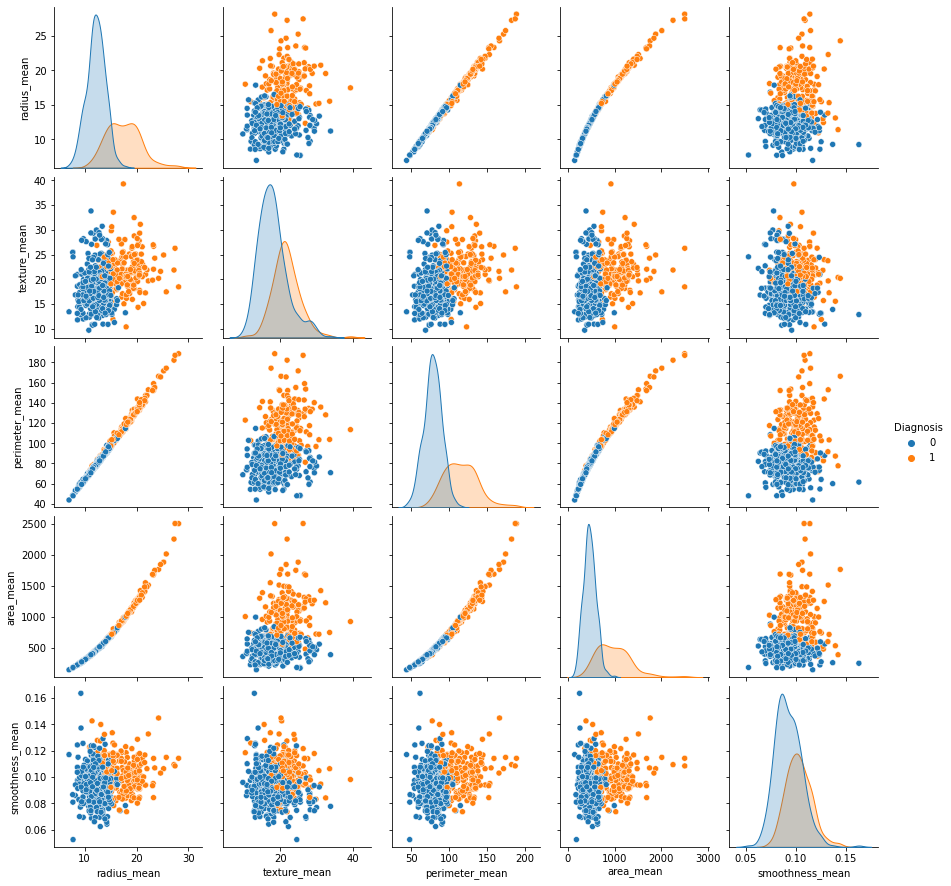

In [9]:
import seaborn as sns
sns.pairplot(data, hue='Diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean'])

# orange = no cancer
# blue = cancer

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, oob_score=True, n_jobs=-1)

In [12]:
rf.fit(X_train, y_train)

C:\Users\aryam\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(n_estimators=50, n_jobs=-1, oob_score=True)

In [13]:
y_predict = rf.predict(X_test)
y_predict

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0])

In [14]:
rf.score(X_test, y_test)

0.9649122807017544

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
accuracy_score(y_test, y_predict)

0.9649122807017544

In [40]:
import tensorflow as tf 
#Intitializing the ANN
ann = tf.keras.models.Sequential()

#Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

#Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

#Adding the third hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

#Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


#compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Training the ANN on Training Set
ann.fit(X_train, y_train, batch_size = 32, epochs = 800)

y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))
l = []
for i in y_pred:
    if i == False:
        l.append(0)
    else:
        l.append(1)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

========================] - 0s 1ms/step - loss: 0.1067 - accuracy: 0.9648
Epoch 612/800
15/15 [==============================] - 0s 1ms/step - loss: 0.1197 - accuracy: 0.9626
Epoch 613/800
15/15 [==============================] - 0s 1ms/step - loss: 0.1109 - accuracy: 0.9604
Epoch 614/800
15/15 [==============================] - 0s 1ms/step - loss: 0.1364 - accuracy: 0.9516
Epoch 615/800
15/15 [==============================] - 0s 1ms/step - loss: 0.1067 - accuracy: 0.9604
Epoch 616/800
15/15 [==============================] - 0s 2ms/step - loss: 0.1136 - accuracy: 0.9495
Epoch 617/800
15/15 [==============================] - 0s 2ms/step - loss: 0.1183 - accuracy: 0.9582
Epoch 618/800
15/15 [==============================] - 0s 1ms/step - loss: 0.1103 - accuracy: 0.9495
Epoch 619/800
15/15 [==============================] - 0s 1ms/step - loss: 0.1069 - accuracy: 0.9582
Epoch 620/800
15/15 [==============================] - 0s 1ms/step - loss: 0.1044 - accuracy: 0.9626
Epoch 621/800
15/

In [41]:
# Creating a pickle file for the classifier
filename = 'cancer-model.pkl'
pickle.dump(rf, open(filename, 'wb'))